# PREAMBLE
#### Some prelimiar configurations are made here, before importing the libraries and starting the code.

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 4.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

In [2]:
palette = ['#dfc27d', '#a6611a']
palette_inv = ['#a6611a', '#dfc27d']

# Functions

In [3]:
def standardization(variable):
    """
    :param variable: the array with the variables you wish to standardize
    :return: standardized array
    """
    var_average = np.average(variable)
    var_std     = np.std(variable)
    new_variable = []
    for i in range(variable.size):
        new_variable_i = (variable[i] - var_average)/var_std
        new_variable.append(new_variable_i)
    new_variable = np.array(new_variable)
    return new_variable

# Libraries

In [4]:
import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt
import seaborn              as sns
import os
import sklearn.preprocessing as pp

In [5]:
psm_path = '../../LargeFilesResults/PSM_analysis/'

In [6]:
psmed_data = pd.read_csv(os.path.join(psm_path, 'uv_redseq_psmed_oneneighbor.csv'))

In [7]:
psmed_data

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,MAG_ABSOLUTE_I,MAG_ABSOLUTE_Z,MAG_ABSOLUTE_Y,MAG_ABSOLUTE_J,MAG_ABSOLUTE_H,MAG_ABSOLUTE_K,UV_CLASS_YI2011,TYPE,BPT_CLASS,WHAN_CLASS
0,594994,588848899931439415,222.9286,-0.152468,3.50,4.62,20.6537,0.0385,2,19.4048,...,-22.029465,-22.442282,-22.047424,-22.231922,-21.964594,-21.916374,UV_UPTURN,3,NaN,Retired/Passive
1,600232,588848900429578535,134.3863,0.325479,3.50,4.62,22.1271,0.1172,0,19.6814,...,-21.315083,-21.715293,-21.262389,-21.368953,-21.091291,-20.952605,UV_UPTURN,3,LINER,Retired/Passive
2,609836,588848900448452756,177.4558,0.352174,3.50,4.62,21.1312,0.0543,2,19.1966,...,-21.563402,-21.957876,-21.504438,-21.593912,-21.337500,-21.125730,UV_UPTURN,3,LINER,Retired/Passive
3,610293,588848900449370284,179.6213,0.360711,3.50,5.28,21.0113,0.0503,0,19.4856,...,-21.092482,-21.392768,60.306025,-21.016597,-20.755046,-20.663166,UV_UPTURN,3,LINER,Retired/Passive
4,610441,588848900449632462,180.2054,0.211046,3.50,4.62,99.0000,99.0000,2,19.6212,...,-22.926391,-23.394366,58.932030,-23.289495,-23.082883,-23.258085,UV_UPTURN,3,NaN,Retired/Passive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,145244,587724650869227683,183.6240,-1.323914,3.50,4.62,20.9746,0.0587,2,19.3470,...,-21.118006,-21.548663,-21.101357,-21.111181,-20.861067,-20.652607,UV_WEAK,3,LINER,Retired/Passive
134,145646,587724650870079712,185.5760,-1.271044,3.65,5.28,20.5001,0.0599,2,19.1995,...,-22.577913,-23.007653,-22.281921,-22.298974,-22.133300,-22.026224,UV_WEAK,3,Composite,Retired/Passive
135,239670,587726014548934888,218.6060,1.636215,3.50,4.62,21.6036,0.1446,0,19.0099,...,-21.967333,-22.365537,-21.799849,-21.887906,-21.589930,-21.403236,UV_WEAK,3,NaN,Retired/Passive
136,240001,587726014549590290,220.0579,1.619308,3.55,4.62,21.1631,0.0964,0,19.7233,...,-23.064314,-23.550886,-23.144908,-23.260421,-23.139547,-23.303878,UV_WEAK,3,NaN,Retired/Passive


In [8]:
for i in psmed_data.keys():
    print(i)

CATAID
OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh

In [9]:
uv_upturn = psmed_data[psmed_data['UV_CLASS_YI2011']=='UV_UPTURN']
uv_weak   = psmed_data[psmed_data['UV_CLASS_YI2011']=='UV_WEAK']

# Blanton properties

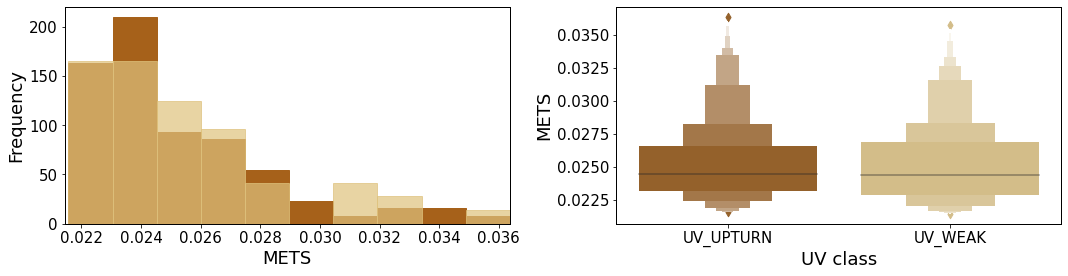

In [10]:
plt.rcParams.update(plotpars_2cols)
plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(uv_upturn['METS'], color=palette[1], label='UV upturn', bins=10, alpha=1, 
                            edgecolor=palette[1], density=True)
plt.hist(uv_weak['METS'], color=palette[0], label='UV weak', bins=bins, alpha=0.7, 
         edgecolor=palette[0], density=True)
plt.xlim([psmed_data['METS'].values.min(), psmed_data['METS'].values.max()])
plt.xlabel('METS')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxenplot(x=psmed_data['UV_CLASS_YI2011'], y=psmed_data['METS'], palette=palette_inv, k_depth="proportion")
plt.ylabel('METS')
plt.xlabel('UV class')
plt.tight_layout()
plt.show()

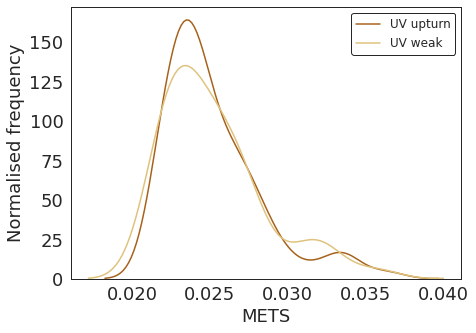

In [11]:
plt.rcParams.update(plotpars)

with sns.axes_style('white', {'axes.grid': False}):
#     plt.subplot(1, 2, 1)
    sns.kdeplot(data=uv_upturn['METS'], color=palette[1], label='UV upturn')
    sns.kdeplot(data=uv_weak['METS'], color=palette[0], label='UV weak')
    plt.xlabel('METS')
    plt.ylabel('Normalised frequency')

#     plt.subplot(1, 2, 2)
#     sns.factorplot(x='UV_CLASS_YI2011', y='METS', hue='UV_CLASS_YI2011', data=psmed_data,
#                    kind='violin', palette=palette, inner='quart', split=True)
#     plt.ylabel('METS')
#     plt.xlabel('UV class')
#     plt.xlabel(r"")
#     plt.tight_layout()

    plt.show()

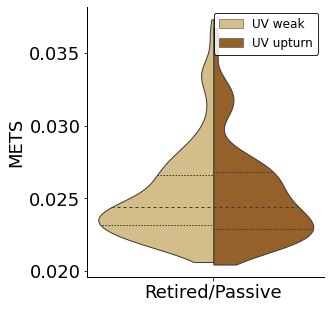

In [12]:
plt.rcParams.update(plotpars)
vplot1 = sns.catplot(x='WHAN_CLASS', y='METS', hue='UV_CLASS_YI2011', data=psmed_data, split=True, kind='violin', 
                     inner="quart", palette={"UV_UPTURN": palette[0], "UV_WEAK": palette[1]}, bw=.3, cut=1, 
                     linewidth=1., x_order=['UV_UPTURN','UV_WEAK'], legend_out=False, figsize=(20,4))
leg = vplot1.axes.flat[0].get_legend()
leg.set_title(None)
new_labels = ['UV weak', 'UV upturn']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.ylabel(r"METS")
plt.xlabel(r"")
plt.show()

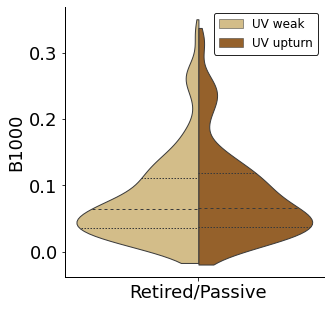

In [13]:
plt.rcParams.update(plotpars)
vplot1 = sns.catplot(x='WHAN_CLASS', y='B1000', hue='UV_CLASS_YI2011', data=psmed_data, split=True, 
                     kind='violin', inner="quart", 
                     palette={"UV_UPTURN": palette[0], "UV_WEAK": palette[1]}, bw=.3, cut=1, linewidth=1., 
                     x_order=['UV_UPTURN','UV_WEAK'], legend_out=False)
leg = vplot1.axes.flat[0].get_legend()
leg.set_title(None)
new_labels = ['UV weak', 'UV upturn']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.ylabel(r"B1000")
plt.xlabel(r"")
plt.show()

/home/mlldantas/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mlldantas/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


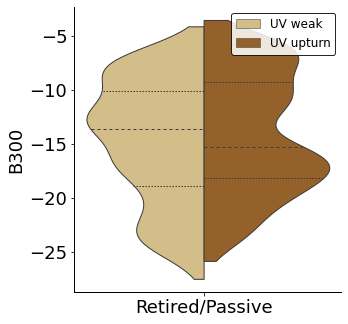

In [14]:
plt.rcParams.update(plotpars)
vplot1 = sns.catplot(x='WHAN_CLASS', y=np.log(psmed_data['B300'].values), hue='UV_CLASS_YI2011', data=psmed_data, split=True, 
                     kind='violin', inner="quart", 
                     palette={"UV_UPTURN": palette[0], "UV_WEAK": palette[1]}, bw=.3, cut=1, linewidth=1., 
                     x_order=['UV_UPTURN','UV_WEAK'], legend_out=False)
leg = vplot1.axes.flat[0].get_legend()
leg.set_title(None)
new_labels = ['UV weak', 'UV upturn']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.ylabel(r"B300")
plt.xlabel(r"")
plt.show()

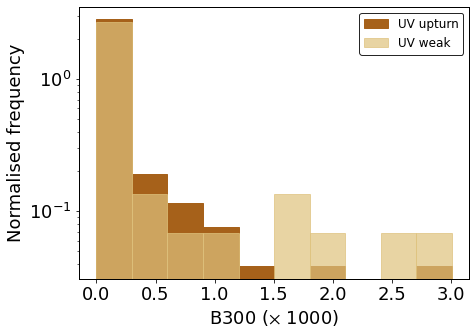

In [15]:
n, bins, patches = plt.hist(uv_upturn['B300']*1000, color=palette[1], label='UV upturn', density=True, bins=10, 
                            edgecolor=palette[1], alpha=1)
plt.hist(uv_weak['B300']*1000, color=palette[0], label='UV weak', density=True, bins=bins, alpha=0.7, 
         edgecolor=palette[0])
plt.yscale('log')
plt.xlabel(r"B300 ($\times$ 1000)")
plt.ylabel('Normalised frequency')
plt.legend(loc='best')
plt.savefig(os.path.join(psm_path, 'psm_b300.png'))
plt.savefig(os.path.join(psm_path, 'psm_b300.pdf'))
plt.show()

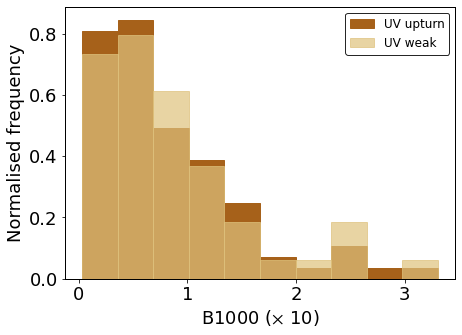

In [16]:
n, bins, patches = plt.hist(uv_upturn['B1000']*10, color=palette[1], label='UV upturn', density=True, bins=10,
                           edgecolor=palette[1])
plt.hist(uv_weak['B1000']*10, color=palette[0], label='UV weak', density=True, bins=bins, alpha=0.7, 
         edgecolor=palette[0])
# plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(r"B1000 ($\times$ 10)")
plt.ylabel('Normalised frequency')
plt.savefig(os.path.join(psm_path, 'psm_b1000.png'))
plt.savefig(os.path.join(psm_path, 'psm_b1000.pdf'))
plt.show()